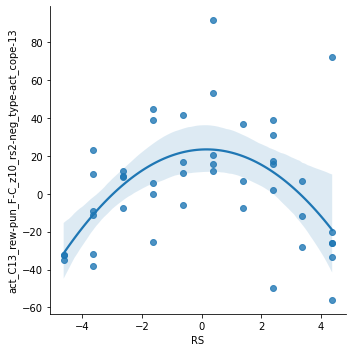

In [1]:
import os
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM


df = pd.read_excel("../derivatives/ppi_wholebrain_scatterplot.xls")

usedir = "../derivatives/"

fig=sns.lmplot(y="act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13",x="RS", data=df, order=2)

SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

In [2]:
ASRD = pd.read_csv('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward/Behavioral_Analysis/Data_Out/AllSharedRewardData.csv')
APD = pd.read_excel('../derivatives/ISTART-ALL-Combined-042122.xlsx')
keepios = [col for col in APD.columns if col.startswith('ios') or col.startswith('sub')]
keepwinlose = [col for col in ASRD.columns if col.startswith('Win') or col.startswith('Lose') or col.startswith('sub')]
df = pd.merge(df, APD[keepios], on = 'sub', how = 'right')
df = pd.merge(df,ASRD[keepwinlose],on='sub', how='right')

df = df.dropna(subset=['Subject']).drop_duplicates(subset=['sub'])
pd.set_option('display.max_columns', None)
df

,Subject,Ones,SU,RS,RS_square,SUxRS,SUxRS_sq,tsnr,fd_mean,ppi_c9_F-C_sub-neg_type-ppi_seed-VS_thr5_cope-09,ppi_C10_FS-C_z8_sub-neg_cluster1_type-ppi_seed-VS_thr5_cope-10,ppi_C10_FS-C_z8_sub-neg_cluster2_type-ppi_seed-VS_thr5_cope-10,ppi_C13_rew-pun_F-C_z1_main-effect_type-ppi_seed-VS_thr5_cope-13,ppi_C13_rew-pun_F-C_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-13,ppi_C16_rew_F-C_z1_main-effect_cluster1_type-ppi_seed-VS_thr5_cope-16,ppi_C16_rew_F-C_z1_main-effect_cluster2_type-ppi_seed-VS_thr5_cope-16,ppi_C21_rew_F-SC_z1_main-effect_type-ppi_seed-VS_thr5_cope-21,ppi_C23_rew-pun_F-SC_z12_su-rs2-neg_cluster1_type-ppi_seed-VS_thr5_cope-23,Unnamed: 18,act_C13_rew-pun_F-C_z9_rs-neg_cluster1_type-act_cope-13,act_C13_rew-pun_F-C_z9_rs-neg_cluster2_type-act_cope-13,act_C13_rew-pun_F-C_z10_rs2-neg_type-act_cope-13,act_C14_rew_F-S_z2_sub_type-act_cope-14,act_C16_rew_F-C_z2_sub_cluster1_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster2_type-act_cope-16,act_C16_rew_F-C_z2_sub_cluster3_type-act_cope-16,Unnamed: 26,sub,ios_fu_score,ios_computer,ios_f,ios_p,Win-Friend,Win-Stranger,Win-Comp,Lose-Friend,Lose-Stranger,Lose-Comp,Win-F-S,Lose-F-S,Win-Lose-F-S
0,1001.0,1.0,0.479686,-0.622222,-7.936790,-0.637264,2.960326,-0.568018,-0.344076,0.257997,0.375157,0.375157,-0.023776,0.055897,0.043499,0.078306,0.070878,-0.255516,NaN,-8.897129,13.637379,41.681642,42.253260,65.702165,7.122439,7.023092,NaN,1001,1,1,5,5,5,-2,5,5,0,4,7,5,2
2,1006.0,1.0,-1.131845,-0.622222,-7.936790,0.365466,2.336405,1.028158,-0.873651,0.297450,0.203178,0.203178,0.148530,-0.553190,0.048455,0.253124,0.390924,0.072858,NaN,30.251268,23.831967,16.998754,-7.474041,-0.526911,5.429469,17.678105,NaN,1006,2,2,4,5,3,2,5,-4,-1,-2,1,-3,4
5,1009.0,1.0,-1.131845,0.377778,-8.181235,-0.766379,2.613079,1.370494,-0.301386,0.042417,0.182616,0.182616,0.239714,-0.081801,0.050043,0.040188,0.026646,0.490375,NaN,6.595074,-9.533180,15.810334,-17.603033,-29.907103,-9.650790,16.099039,NaN,1009,2,1,5,6,5,4,4,-5,-4,-4,1,-1,2
6,1010.0,1.0,3.190376,-1.622222,-5.692346,-5.514293,11.170422,-0.991437,0.558449,-0.320931,-0.771705,-0.771705,0.365152,0.310482,0.266391,0.314331,0.787606,0.549525,NaN,17.901311,5.852669,-0.372075,55.805235,50.540134,6.244366,38.020551,NaN,1010,999,999,6,6,1,-2,-5,2,-3,-5,3,5,-2
7,1011.0,1.0,-1.416233,2.377778,-2.670123,-3.706279,-5.232523,-1.678332,1.498732,0.145049,0.365831,0.365831,0.092184,0.100279,0.175593,0.219936,0.189737,0.867485,NaN,2.925382,-3.930550,-49.534258,-28.170113,-91.601465,-36.733455,-4.753485,NaN,1011,999,999,7,5,5,5,2,-5,-5,-5,0,0,0
8,1012.0,1.0,-1.416233,-4.622222,13.040988,6.207349,-27.483110,1.848663,-0.503759,-0.013332,0.009177,0.009177,0.378428,0.155933,0.043638,0.353492,0.486492,0.422158,NaN,11.327013,13.066474,-32.424188,16.102053,26.131065,9.599253,14.623979,NaN,1012,2,1,5,5,3,0,0,-3,0,0,3,-3,6
9,1013.0,1.0,-0.784260,4.377778,10.840988,-3.772108,-12.255679,1.641652,-1.226546,-0.378109,-0.605608,-0.605608,0.455745,0.311818,0.119283,0.313436,0.472415,0.658556,NaN,-17.628091,-22.757951,72.409352,9.236502,16.521445,23.461320,22.190701,NaN,1013,1,2,4,4,5,-3,2,-4,1,-2,8,-5,13
10,1015.0,1.0,2.280808,-3.622222,4.796543,-8.600388,32.699942,1.036199,0.026285,-0.003946,0.072898,0.072898,-0.115848,-0.388807,-0.175202,-0.177472,-0.368274,-1.191504,NaN,40.869142,45.296894,-38.254058,18.307630,17.878657,-0.846581,11.462377,NaN,1015,999,999,4,4,5,3,0,-5,-3,0,2,-2,4
11,1016.0,1.0,-1.131845,2.377778,-2.670123,-3.030068,-3.624644,0.622423,-0.852990,-0.116670,-0.199670,-0.199670,0.080310,-0.173079,0.058062,0.080091,0.026008,-0.581918,NaN,4.147273,-1.424607,30.937926,5.750453,7.965719,-28.770771,-14.974027,NaN,1016,999,999,2,3,0,0,0,0,0,0,0,0,0
12,1019.0,1.0,0.005706,2.377778,-2.670123,-0.325225,2.806873,0.508749,-0.030714,0.102273,0.072940,0.072940,0.191917,0.115367,0.292681,0.336221,0.540465,0.609322,NaN,-3.840220,-14.403898,15.483372,-12.165016,9.255460,26.565141,22.041908,NaN,1019,999,999,3,3,5,2,0,-3,0,0,3,-3,6


Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: -0.08156972693500016 ; p: 0.6858686472949822


Difference b/w friend and stranger for: Post-Scan Ratings vs TPJ activation -  r: 0.1182044748784131 ; p: 0.5570628484166428


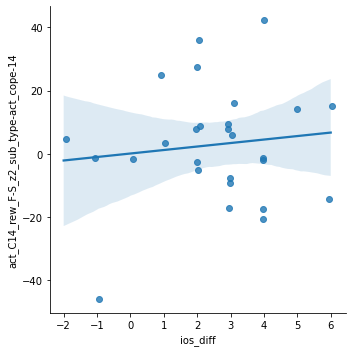

<class 'seaborn.axisgrid.FacetGrid'>


Difference b/w friend and stranger for: Closeness rating vs TPJ activation -  r: 0.2066830712620915 ; p: 0.18358906979908687


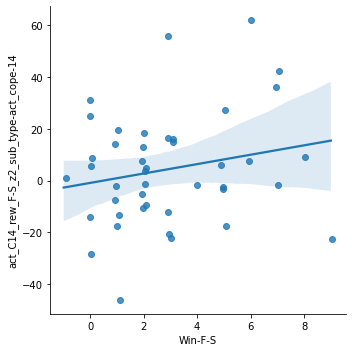

<class 'seaborn.axisgrid.FacetGrid'>


In [3]:
df = df.replace(999, np.NaN)
df['ios_diff'] = df['ios_p'] - df['ios_fu_score'] #ios_p was participant rating of frend, ios_fu was participant rating of stranger in follow-up. ios_f was FRIEND rating of participant
df['Win_F_C'] = df['Win-Friend'] - df['Win-Comp']
df_ios = df.dropna(subset=['ios_diff'])
df_psr = df.dropna(subset = ['Win-F-S'])
df_both = df_psr.dropna(subset=['ios_diff'])

r,p = stats.pearsonr(df_both['Win-F-S'], df_both['ios_diff'])
print("Difference b/w friend and stranger for: Post-Scan Ratings vs Closeness -  r: %s ; p: %s" %(r,p))

r,p = stats.pearsonr(df_ios['act_C14_rew_F-S_z2_sub_type-act_cope-14'], df_ios['ios_diff'])
print("\n\nDifference b/w friend and stranger for: Post-Scan Ratings vs TPJ activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='ios_diff',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_ios, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

r,p = stats.pearsonr(df_psr['Win-F-S'], df_psr['act_C14_rew_F-S_z2_sub_type-act_cope-14'])
print("\n\nDifference b/w friend and stranger for: Closeness rating vs TPJ activation -  r: %s ; p: %s" %(r,p))

g=sns.lmplot(x='Win-F-S',y='act_C14_rew_F-S_z2_sub_type-act_cope-14',data=df_psr, x_jitter=.1,y_jitter=.1)
plt.show()
print(type(g))

In [12]:
os.chdir('C:/Users/tup54227/Documents/GitHub/istart/Shared_Reward')
#Make a list of all the SR Files
SR_flist=[os.path.join(root, f) for root, dirs, files in os.walk('logs') for f in files if 'SR-Rating' in f]

#Make a list of Dataframes
ratings_list=[]
for f in SR_flist:
    sub=re.search('sub(.*)_',f).group(1)
    if any(i.isdigit() for i in sub):
        tmp_df=pd.read_csv(f)
        tmp_df['sub']=sub
        ratings_list.append(tmp_df)
#Concatonate the DataFrames together
srpr_df=pd.concat(ratings_list)
srpr_df=srpr_df.reset_index(drop=True)
#srpr_df['Rating'].astype(float)
srpr_df

srpr_df.groupby(by = ['sub','Partner','Trait']).mean()
srpr_df[srpr_df['Rating']=='Rating']

#sort by Trait, then Partner

C:\Users\tup54227\AppData\Local\Temp\ipykernel_15908\913259010.py:19: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  srpr_df.groupby(by = ['sub','Partner','Trait']).mean()


,TrialNumber,Partner,Trait,ran,order,Rating,sub
114,﻿TrialNumber,Partner,Trait,ran,order,Rating,1251
139,﻿TrialNumber,Partner,Trait,ran,order,Rating,1282
176,﻿TrialNumber,Partner,Trait,ran,order,Rating,1302


In [5]:

srpr_anova = AnovaRM(srpr_df, 'Rating', 'sub', within=['Partner', 'Trait'])
srpr_results = srpr_anova.fit()

print(srpr_results)

ValueError: The data set contains more than one observation per subject and cell. Either aggregate the data manually, or pass the `aggregate_func` parameter.

In [ ]:
df_psr

In [ ]:
df_psr['Win_F_S']=df_psr['Win-F-S']
ratings_lm = ols("Win_F_S ~ SU + RS + SU:RS", data=df_psr).fit()

sm.stats.anova_lm(ratings_lm, typ=2)
ratings_lm.summary()